<a href="https://colab.research.google.com/github/PercyAyimbilaNsolemna/Frequency_Filters_And_Geometric_Transforms_Group8/blob/main/geometricImageTransforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPLEMENTING AND VISUALIZING GEOMETRIC IMAGE TRANSFORMS**

In this notebook, we will be applying the specified transformations to images
- **Rotation**
- **Scaling**
- **Perspective warp**




In [ ]:
#Install Pillow if not already installed
!pip install Pillow

In [ ]:
#Imports openCV
import cv2

#Imports numpy
import numpy as np

#Imports matplotlib
import matplotlib.pyplot as plt

#Imports Image from PIL
from PIL import Image

#Imports display from Ipython.display
from IPython.display import display

#Imports drive from google.colab
from google.colab import drive

## **MOUNT GOOGLE DRIVE AND READ IMAGE**

In this section google drive will be mounted so that files in the drive (cat image) can be accessed.

- **Mounting Google Drive using mount method in the drive module or class**
- **Reads the image using imread from cv2**

In [ ]:
#Mount google drive so that the cat image can be read
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reads the cat image using imread
# catImage = cv2.imread('/content/drive/MyDrive/Image Processing/Group Work/Images/cat.jpeg')
catImage = cv2.imread('/content/cat.jpeg')

In [ ]:
#Checks if the image has been loaded successfully else displays a message to show the image has not been loaded
assert catImage is not None, "File could not be read, check with os.path.exists() or the path to the file in google drive"
print("\033[92mImage successfully loaded")

Image successfully loaded


## **IMAGE CONVERSION**

All images loaded using cv2's **imread are loaded in the Blue Green Red (BGR) format**. In  order to view the original image in Red Green Blue (RGB), **the BGR image will be converted to RGB format for display.**

In [ ]:
#Converts the image from BGR to RGB inorder to view the original image
catImageRGB = cv2.cvtColor(catImage, cv2.COLOR_BGR2RGB)

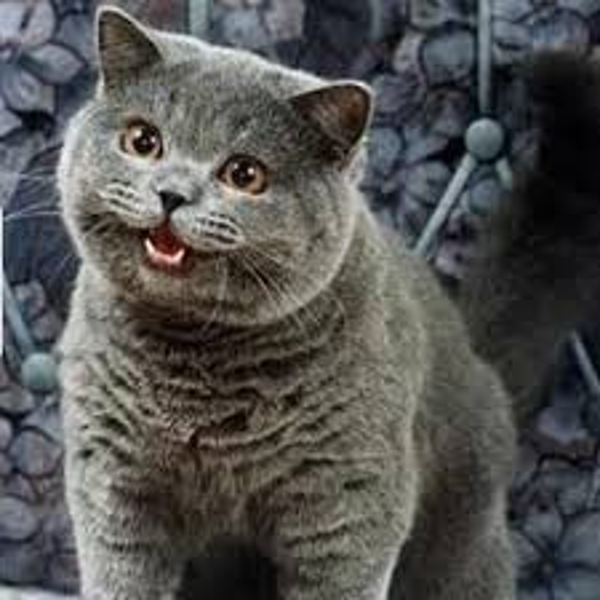

In [ ]:
#Uses fromarray method in the Image module in Pillow to transform the numpy array to an image
catImageRGBPil = Image.fromarray(catImageRGB)
#Resizes the cat image
catImageRGBPil = catImageRGBPil.resize((600, 600))
#Displays the image using display method from Ipython.display
display(catImageRGBPil)

## **IMAGE DISPLAY**

This defines a method that takes a numpy array and displays the image using Pillow. This is to make the code DRY and prevent repitition

In [ ]:
def display_image(imageArray):
  #Uses fromarray method in the Image module in Pillow to transform the numpy array to an image
  imagePil = Image.fromarray(imageArray)
  #Resizes the cat image
  imagePil = imagePil.resize((600, 600))
  #Displays the image using display method from Ipython.display
  display(imagePil)

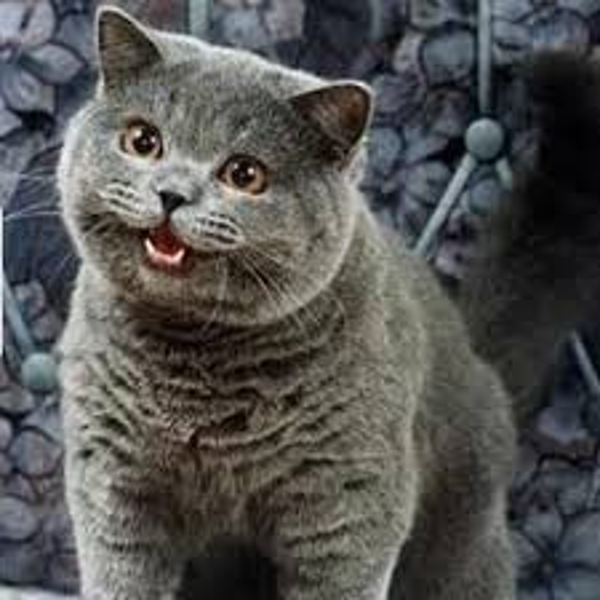

In [ ]:
display_image(catImageRGB)

## **IMAGE TRANSLATION**
Translation refers to the rectilinear shift of an object i.e. an image from one location to another.

Image translation refers to the conversion of one image representation to another image representation.

If we know the amount of shift in horizontal and the vertical direction, say (tx, ty) respectively then we can make a transformation matrix e.g.  \begin{bmatrix}  1 & 0 & tx \\ 0 & 1 & ty \end{bmatrix}  where tx denotes the shift along the x-axis and ty denotes shift along the y-axis i.e. the number of pixels by which we need to shift about in that direction. Now, we can use the **cv2.wrapAffine()** function to implement these translations. This function requires a 2×3 array. The numpy array should be of float type.

In [ ]:
#Defines a method that translates an image
def translate_image(image, tx, ty):
    #Extracts the rows and columns from the image
    rows, cols, channels = image.shape
    #Defines the translation matrix
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    #Uses the warpAffine method to apply the translation
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    #Returns the image
    return translated_image

In [ ]:
#Sets the shift along the x axis (tx)
tx = 60

#Sets the shift along the y axis(ty)
ty = 60

#Calls the translate_image function
translated_cat = translate_image(catImageRGB, tx, ty)

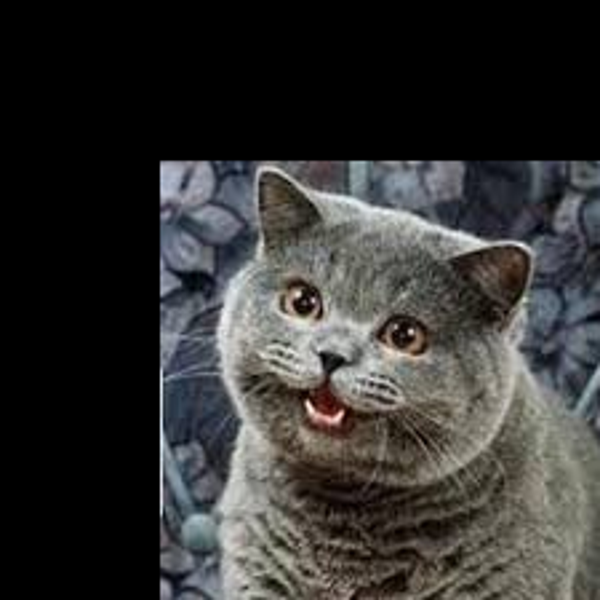

In [ ]:
#Calls the display image function to output the image
display_image(translated_cat)

# **ADVANTAGES OF IMAGE TRANSLATION**
- Hiding a part of the image
- Cropping an image
- Shifting an image
- Animating an image using image translations in loop.

## **IMAGE ROTATION**

Image Rotation refers to the process of rotating an image about a fixed point (usually the center) by a specified angle. The rotation is achieved by creating a transformation matrix that defines the rotation angle and optionally a scaling factor. OpenCV provides the **cv2.getRotationMatrix2D()** function to create the transformation matrix, and **cv2.warpAffine()** applies the rotation.

In [ ]:
#Defines a function for rotating images
def rotate_image(image, angle, scale=1.0):
    #Extracts the rows, columns and channels from the image
    rows, cols, _ = image.shape
    #Finds the centre of the image
    center = (cols // 2, rows // 2)
    #Uses getRotationMatrix2D method to get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    #Applies the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    #Returns the rotated image
    return rotated_image

In [ ]:
#Sets the angle for the rotation
angle = 270

#Sets the scale
scale = 1

#Calls the rotate image function
rotated_cat = rotate_image(catImageRGB,angle, scale)

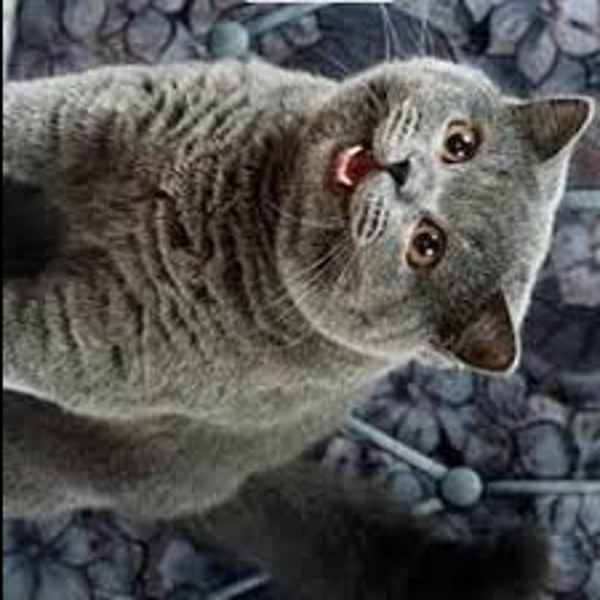

In [ ]:
#Dispalys the image using the display image function
display_image(rotated_cat)

## **IMAGE SCALING**

**Scaling** is the process of resizing an image. We deal with the dimensions of an image. Scaling down deals with making image smaller while Scaling up refers to increase the size of image. Scaling is a very important process in image manipulation because sometimes we get image size smaller than expected and sometimes it is very large. So, in order to make image of perfect size to use Scaling is performed.

In [ ]:
#Defines the image scaling function
def scale_image(image, scale_x, scale_y):
    scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
    return scaled_image

In [ ]:
#Sets the x direction of the resize
scale_x = 2

#Sets the y direction of the resize
scale_y = 2

#Calls the scale_image function and out the image
scaled_cat = scale_image(catImageRGB, scale_x, scale_y)

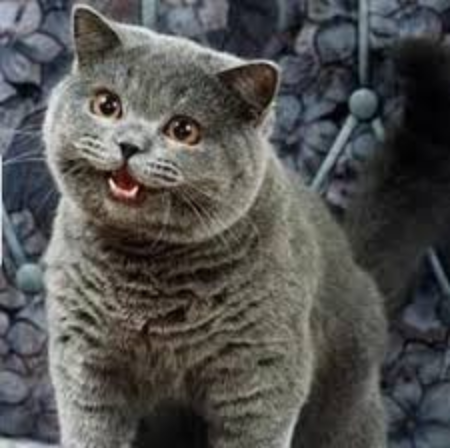

In [ ]:
#Displays the image

#Uses fromarray method in the Image module in Pillow to transform the numpy array to an image
scale_cat_pil = Image.fromarray(scaled_cat)
#Displays the image using display method from Ipython.display
display(scale_cat_pil)

## **IMAGE PERSPECTIVE WARP**

**Perspective warp** refers to the transformation of an image so that it appears to be viewed from a different perspective or angle. It involves mapping points from one plane to another while maintaining the straight lines in the image.

This transformation is commonly used to correct distortions caused by the camera's angle or to simulate a 3D perspective. For instance, you can transform a rectangular object in an image to appear as a trapezoid, simulating a tilt or skew.

In [ ]:
#Defines a function that applies a perspective warp to an image
def perspective_warp(image):
    rows, cols, _ = image.shape
    #Defines the 4 corner points in the original image
    pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1], [cols - 1, rows - 1]])
    #Defines the new position for the original 4 corner points
    pts2 = np.float32([[50, 50], [cols - 100, 50], [50, rows - 100], [cols - 100, rows - 100]])
    #Uses the getPerspectiveTransform method to get the perspective matrix
    perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
    #Applies the perspective warp to the image
    warped_image = cv2.warpPerspective(image, perspective_matrix, (cols, rows))
    #Returns the warped image
    return warped_image

In [ ]:
#Calls the perspective warp image
warped_cat = perspective_warp(catImageRGB)

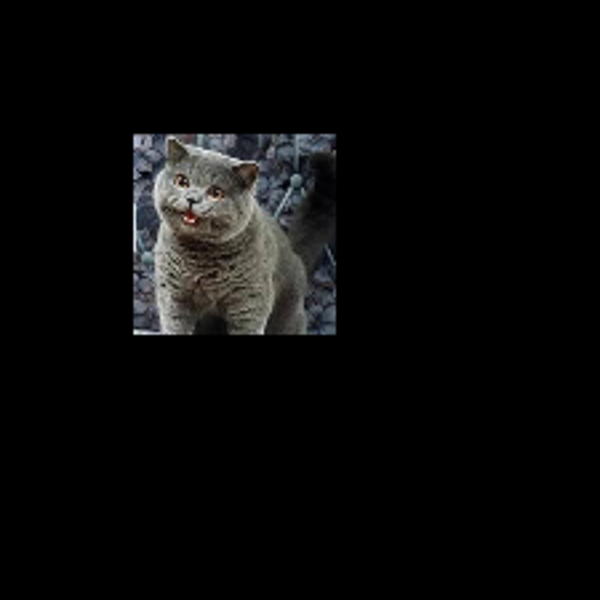

In [ ]:
#Dispalys the warped cat image
display_image(warped_cat)